Tema:

Exercitiul 1

Se considera o lista de numere intregi, sa se scrie o fuctie care construieste un dictionar in care fiecare numar din lista initiala are asociat multimea divizorilor sai.

Exemplu: [12, 13, 14, 15, 16] => {12: {1,2,3,4,6,12}, 13: {1, 13}, 14:{1,2,7,14}, 15: {1,3,5,15}, 16:{1,2,4,8,16}}

In [2]:
from functools import reduce

def multimea_divizorilor(n, i=1, multime= None):
  if multime == None:
    multime = set()
  if i>n/2:
    return multime
  if n%i == 0:
    multime.add(i)
    multime.add(n//i)
  return multimea_divizorilor(n, i+1, multime)

def adauga_dictionar(acc, el):
  acc[el] = multimea_divizorilor(el)
  return acc

def transformare(lista):
  return reduce(lambda acc, el: adauga_dictionar(acc,el),lista, {})

print(transformare( [12, 13, 14, 15, 16] ))

{12: {1, 2, 3, 4, 6, 12}, 13: {1, 13}, 14: {1, 2, 14, 7}, 15: {1, 3, 5, 15}, 16: {1, 2, 4, 8, 16}}


### ARBORI

Un arbore este un graf neorientat, conex (exista drum de la orice nod la orice nod, deci nu contine noduri izolate) si fara cicluri.

**Arbori oarecare**

Arbori oarecare - nodurile pot avea oricat de multi fii (va fi nevoie sa ii retinem intr-o lista)

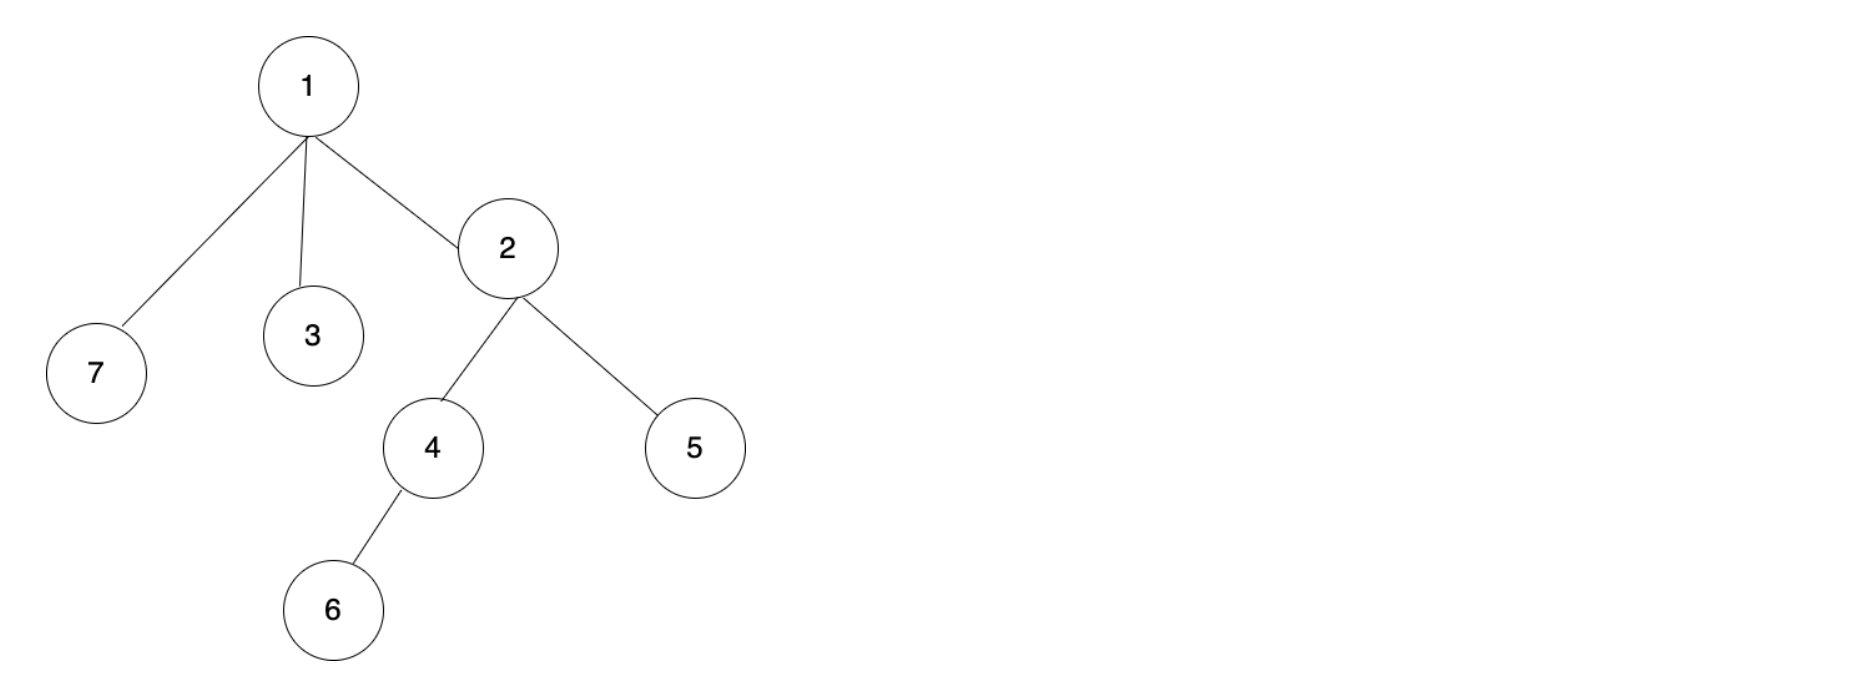

In [3]:
nod7 = {"value":7, "children":[]}
nod6 = {"value":6, "children":[]}
nod3 = {"value":3, "children":[]}
nod5 = {"value":5, "children":[]}
nod4 = {"value":4, "children":[nod6]}
nod2 = {"value": 2, "children": [nod4, nod5]}
nod1 = {"value": 1, "children":[nod2, nod3, nod7]}
radacina = nod1
print(radacina)

{'value': 1, 'children': [{'value': 2, 'children': [{'value': 4, 'children': [{'value': 6, 'children': []}]}, {'value': 5, 'children': []}]}, {'value': 3, 'children': []}, {'value': 7, 'children': []}]}


In [4]:
# Exemplu: Scrieti o functie care primeste ca parametru un arbore oarecare si
#          returneaza o lista cu nodurile frunza (nodurile terminale)

def lista_frunze(arbore, lista= None):
  if lista == None:
    lista = []
  if len(arbore["children"]) == 0: # este nod frunza
    lista = lista + [arbore["value"]]
  else:
    return reduce(lambda acc, el: acc + lista_frunze(el),arbore["children"],lista) 
  return lista

print(lista_frunze(radacina))

[6, 5, 3, 7]


**Arbori binari**

Arbori binari - fiecare nod poate avea MAXIM doi fii (ii vom retine folosind o structura simplificata in care nodurile au o valoare, un fiu stang si un fiu drept)

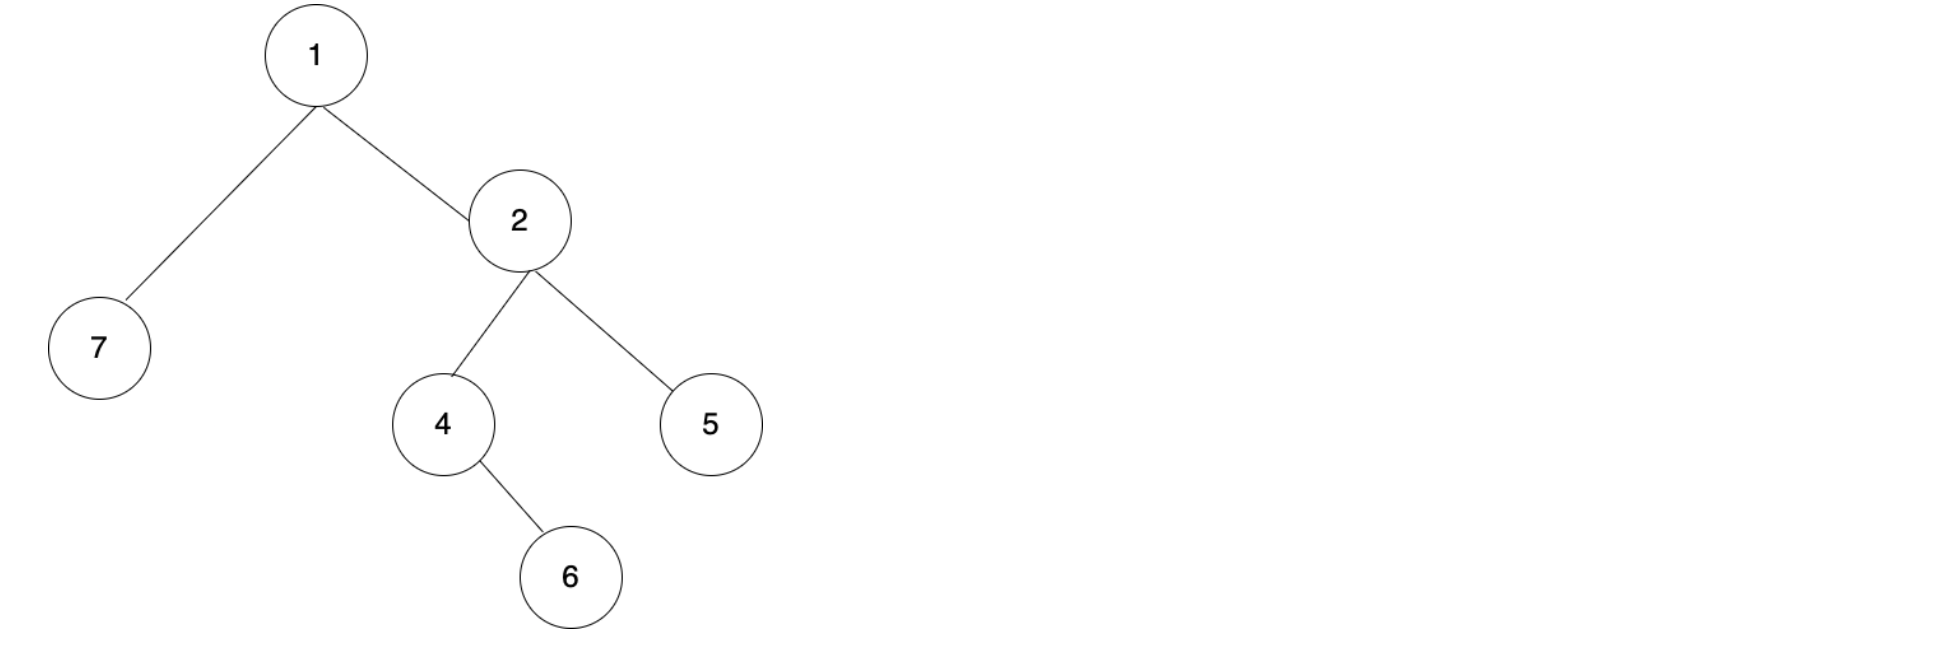

In [5]:
nod7 = {"value": 7, "left": None , "right": None}
nod6 = {"value": 6, "left": None , "right": None}
nod5 = {"value": 5, "left": None , "right": None}
nod4 = {"value": 4, "left": None , "right": nod6}
nod2 = {"value": 2, "left": nod4 , "right": nod5}
nod1 = {"value": 1, "left": nod7 , "right": nod2}
radacina = nod1
print(radacina)

{'value': 1, 'left': {'value': 7, 'left': None, 'right': None}, 'right': {'value': 2, 'left': {'value': 4, 'left': None, 'right': {'value': 6, 'left': None, 'right': None}}, 'right': {'value': 5, 'left': None, 'right': None}}}


In [6]:
# Exemplu: Scrieti o functie care primeste ca parametru un arbore binar si
#          returneaza o lista cu nodurile frunza (nodurile terminale)

def lista_frunze(arbore_binar, lista=None):
  if lista == None:
     lista = []
  if arbore_binar["left"] == None and arbore_binar["right"]==None:
    lista = lista + [arbore_binar["value"]]
  if arbore_binar["left"] != None:
    lista = lista + lista_frunze(arbore_binar["left"])
  if arbore_binar["right"] != None:
    lista = lista + lista_frunze(arbore_binar["right"])
  return lista

print(lista_frunze(radacina))

[7, 6, 5]


Exista 3 tipuri de parcurgeri: **preordine** (nod_curent, left, right), **inordine** (left, nod_curent, right), **postordine**(left, right, nod_curent)

Exemple: (Primul exemplu il gasiti detaliat pe Campus Virtual: [Material - Laborator 8 (1.1C, 1.2D)](https://cv.upt.ro/mod/page/view.php?id=346884))

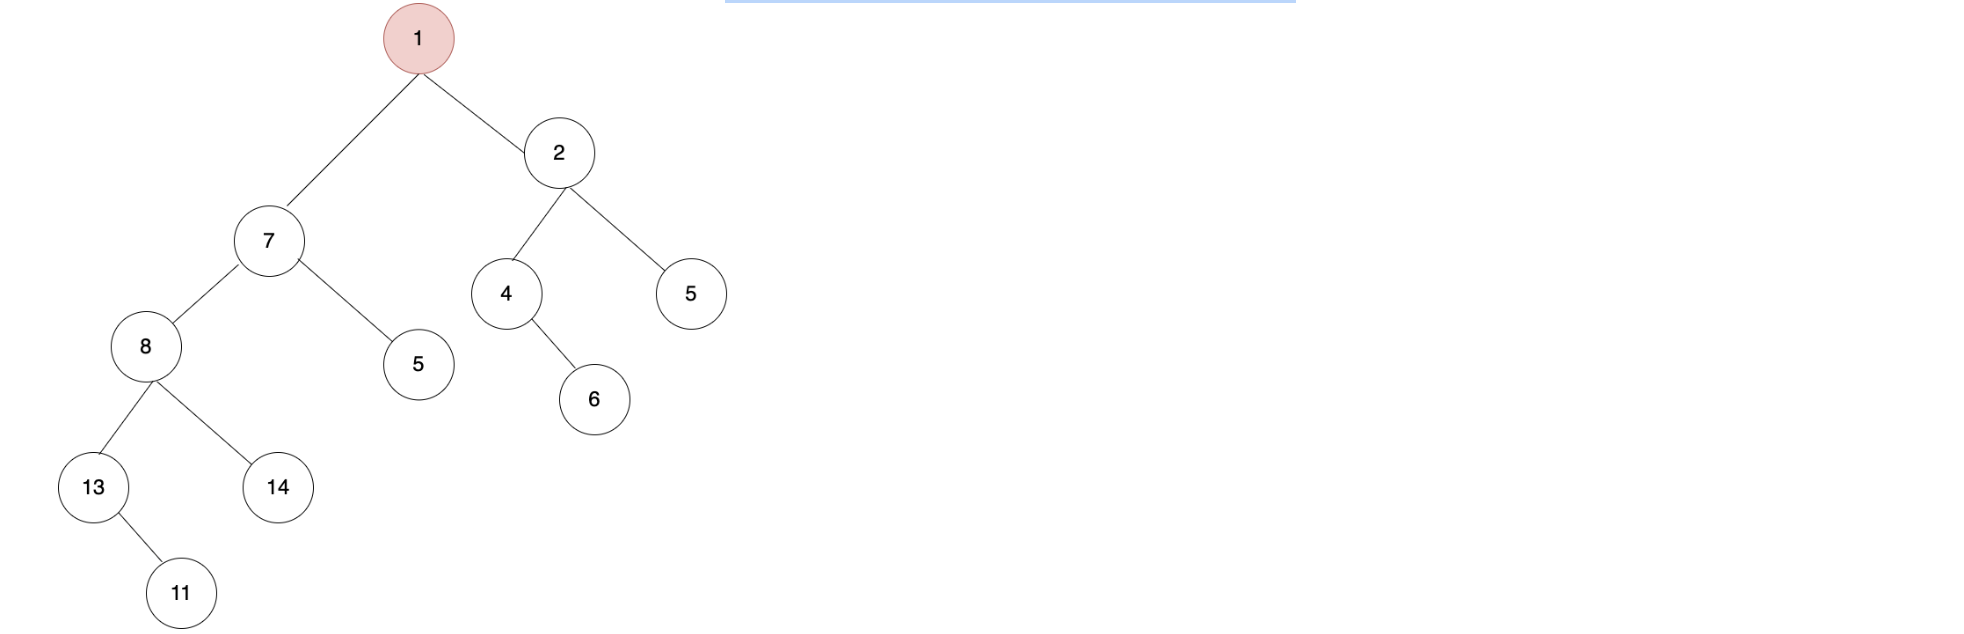

Preordine: 1, 7, 8, 13, 11, 14, 5, 2, 4, 6, 5

Inordine: 13, 11, 8 , 14, 7, 5, 1, 4, 6, 2, 5

Postordine: 11, 13, 14, 8, 5, 7, 6, 4, 5, 2, 1

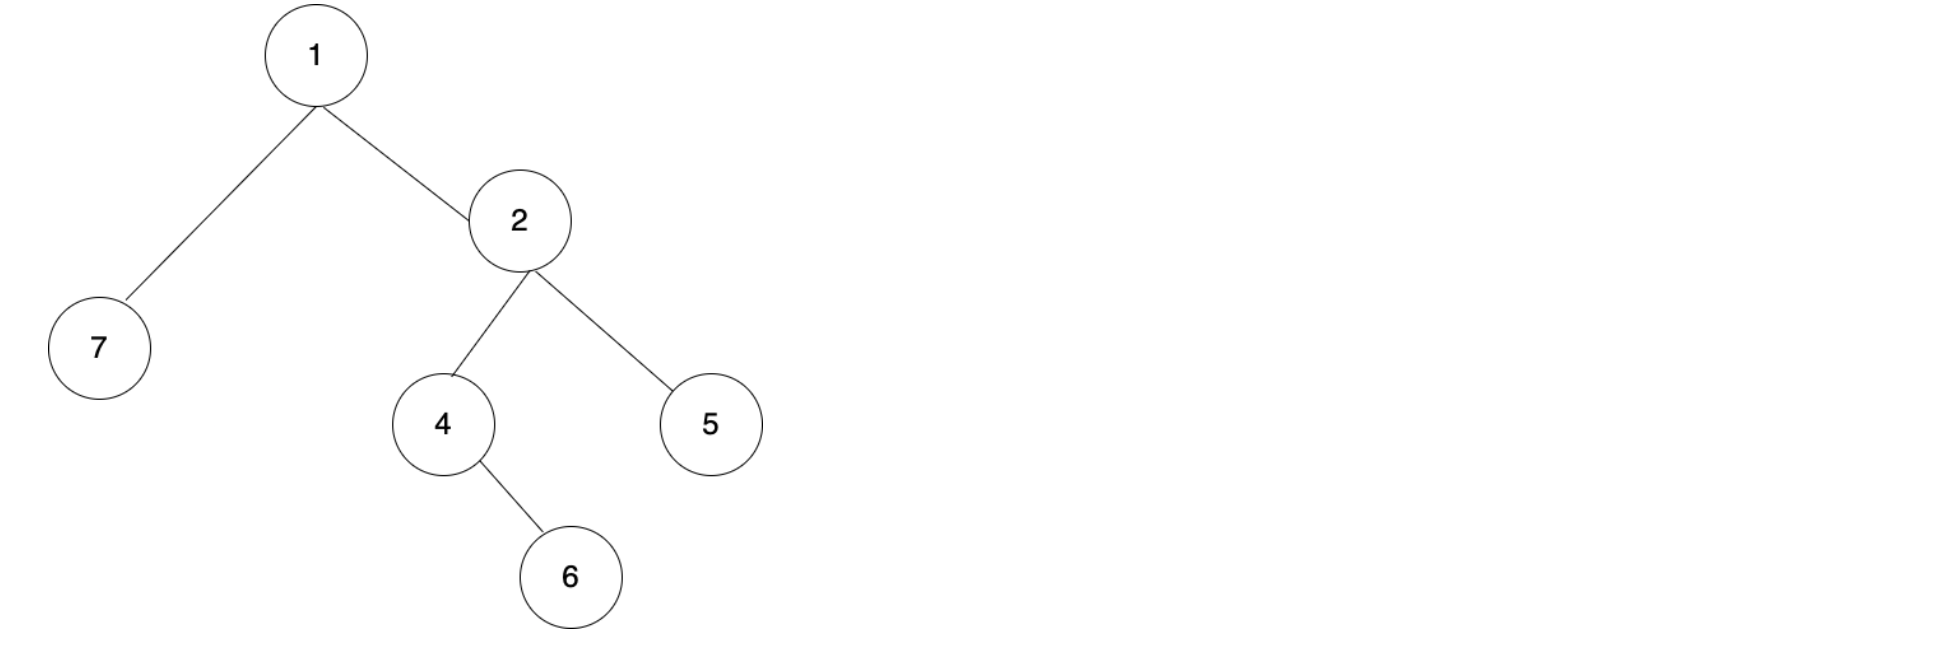

Preordine: 1, 7, 2, 4, 6, 5

Inordine: 7, 1, 4, 6, 2, 5

Postordine: 7, 6, 4, 5, 2, 1

**Util:** Puteti vizualiza cele 3 tipuri de parcurgeri pe [site-ul acesta](https://tree-visualizer.netlify.app/) pentru diferite exemple de arbori.

Pentru a va crea arborele trebuie sa dati click pe un nod (reprezentat printr-un cerc), apoi aveti un camp de input in partea de sus unde puteti edita valoarea nodului, apasati pe butonul edit. De asemenea sub fiecare nod exista doua plusuri, puteti da pe acestea pentru a crea fiul stang sau drept.

La final, pentru a vizualiza dati pe butonul de Cancel (coltul dreapta, sus) si veti avea in coltul stanga sus un dropdown cu optiunile Vizualize Pre-order, In-order si Post-order. Selectati varianta dorita si dati click pe ea.

In [7]:
def preordine(arbore_binar):
  print(arbore_binar["value"])
  if arbore_binar["left"] != None:
    preordine(arbore_binar["left"])
  if arbore_binar["right"] != None:
    preordine(arbore_binar["right"])

preordine(radacina)

1
7
2
4
6
5


In [8]:
def inordine(arbore_binar):
  if arbore_binar["left"] != None:
    inordine(arbore_binar["left"])
  print(arbore_binar["value"])
  if arbore_binar["right"] != None:
    inordine(arbore_binar["right"])

inordine(radacina)

7
1
4
6
2
5


In [9]:
def postordine(arbore_binar):
  if arbore_binar["left"] != None:
    postordine(arbore_binar["left"])
  if arbore_binar["right"] != None:
    postordine(arbore_binar["right"])
  print(arbore_binar["value"])

postordine(radacina)

7
6
4
5
2
1


In [10]:
# Exemplu: Scrieti o functie care calculeaza inaltimea unui arbore binar
# Pentru exemplul din figura noastra, inaltimea este 4

def calculeaza_inaltime(arbore_binar):
  if arbore_binar["left"] == None and arbore_binar["right"] == None:
    return 1
  l = 0
  r = 0
  if arbore_binar["left"] != None:
    l = 1 + calculeaza_inaltime(arbore_binar["left"]) # 1 + 1 + 1 + 1
  if arbore_binar["right"] != None:
    r = 1 + calculeaza_inaltime(arbore_binar["right"]) # 1 + 1 + 1 + 1
  return max(l,r)

print(calculeaza_inaltime(nod1)) 

4


In [11]:
def calculeaza_inaltime(arbore_binar):
  if arbore_binar["left"] == None and arbore_binar["right"] == None:
    return 1

  if arbore_binar["right"] != None and arbore_binar["left"] ==None:
    return 1 + calculeaza_inaltime(arbore_binar["right"])

  if arbore_binar["right"] == None and arbore_binar["left"] != None:
    return 1 + calculeaza_inaltime(arbore_binar["left"])

  if arbore_binar["right"] != None and arbore_binar["left"]!=None:
    return 1 +  max(calculeaza_inaltime(arbore_binar["left"]), calculeaza_inaltime(arbore_binar["right"]))


print(calculeaza_inaltime(nod1))

4


In [12]:
# Exercitiul 3: Scrieti o functie care ia ca parametru o alta functie
#               (care primeste ca parametru un intreg, si returneaza un intreg,
#               de exemplu lambda x: 2*x) si un arbore binar si aplica functia primita
#               ca parametru pentru fiecare nod al arborelui, parcurgand arborele
#               in postordine

def aplica_functie(arbore_binar, functie):
  if arbore_binar["left"] !=None:
    aplica_functie(arbore_binar["left"], functie)
  if arbore_binar["right"] !=None:
    aplica_functie(arbore_binar["right"], functie)
  print(functie(arbore_binar["value"])) # arbore_binar["value"] = functie(arbore_binar["value"])

aplica_functie(radacina, lambda x: 2*x)

14
12
8
10
4
2


In [13]:
preordine(radacina) # valorile nu au ramas modificate

1
7
2
4
6
5


In [14]:
def aplica_functie(arbore_binar, functie):
  if arbore_binar["left"] !=None:
    aplica_functie(arbore_binar["left"], functie)
  if arbore_binar["right"] !=None:
    aplica_functie(arbore_binar["right"], functie)
  arbore_binar["value"] = functie(arbore_binar["value"])

aplica_functie(radacina, lambda x: 2*x)

In [15]:
preordine(radacina) # valorile raman modificate (arbore_binar["value"] = functie(arbore_binar["value"]))

2
14
4
8
12
10


In [16]:
nod7 = {"value": 7, "left": None , "right": None}
nod6 = {"value": 6, "left": None , "right": None}
nod5 = {"value": 5, "left": None , "right": None}
nod4 = {"value": 4, "left": None , "right": nod6}
nod2 = {"value": 2, "left": nod4 , "right": nod5}
nod1 = {"value": 1, "left": nod7 , "right": nod2}
radacina = nod1 
print(radacina)

{'value': 1, 'left': {'value': 7, 'left': None, 'right': None}, 'right': {'value': 2, 'left': {'value': 4, 'left': None, 'right': {'value': 6, 'left': None, 'right': None}}, 'right': {'value': 5, 'left': None, 'right': None}}}


In [17]:
# Implementati in Python o functie recursiva care ia 2 parametri: un arbore binar cu
# informatia din noduri numere intregi, si o functie booleana (ex: lambda a: a%2==0),
# si returneaza True daca exista cel putin o valoare in nodurile arborelui care
# indeplineste conditia cond, False altfel.

def exists(arbore_binar, conditie):
  if(conditie(arbore_binar["value"])):
    return True
  l = False
  r = False
  if arbore_binar["left"] != None:
    l = exists(arbore_binar["left"], conditie)
  if arbore_binar["right"] != None:
    r = exists(arbore_binar["right"], conditie)
  return l or r
print(exists(nod1, lambda x: x%2 == 0))
print(exists(nod1, lambda x: x>50))
print(exists(nod1, lambda x: x%10 == 3))

True
False
False


In [18]:
def exists(arbore_binar, conditie):
  if arbore_binar["left"] == None and arbore_binar["right"] == None:
    return conditie(arbore_binar["value"])
  if arbore_binar["left"] != None and arbore_binar["right"] == None:
    return exists(arbore_binar["left"], conditie)
  if arbore_binar["right"] != None and arbore_binar["left"] == None:
    return exists(arbore_binar["right"], conditie)
  if arbore_binar["right"] != None and arbore_binar["left"] != None:
    return exists(arbore_binar["right"], conditie) or exists(arbore_binar["left"], conditie)

print(exists(nod1, lambda x: x%2 == 0))
print(exists(nod1, lambda x: x>50))
print(exists(nod1, lambda x: x%10 == 3))

True
False
False


**Arbori binari de cautare**

Arbori binari de cautare - sunt arbori binari cu proprietatea ca pentru orice nod, cheile din subarborele stang au valori mai mici decat acel noi, iar cheile din subarborele drept au valori mai mari decat el.

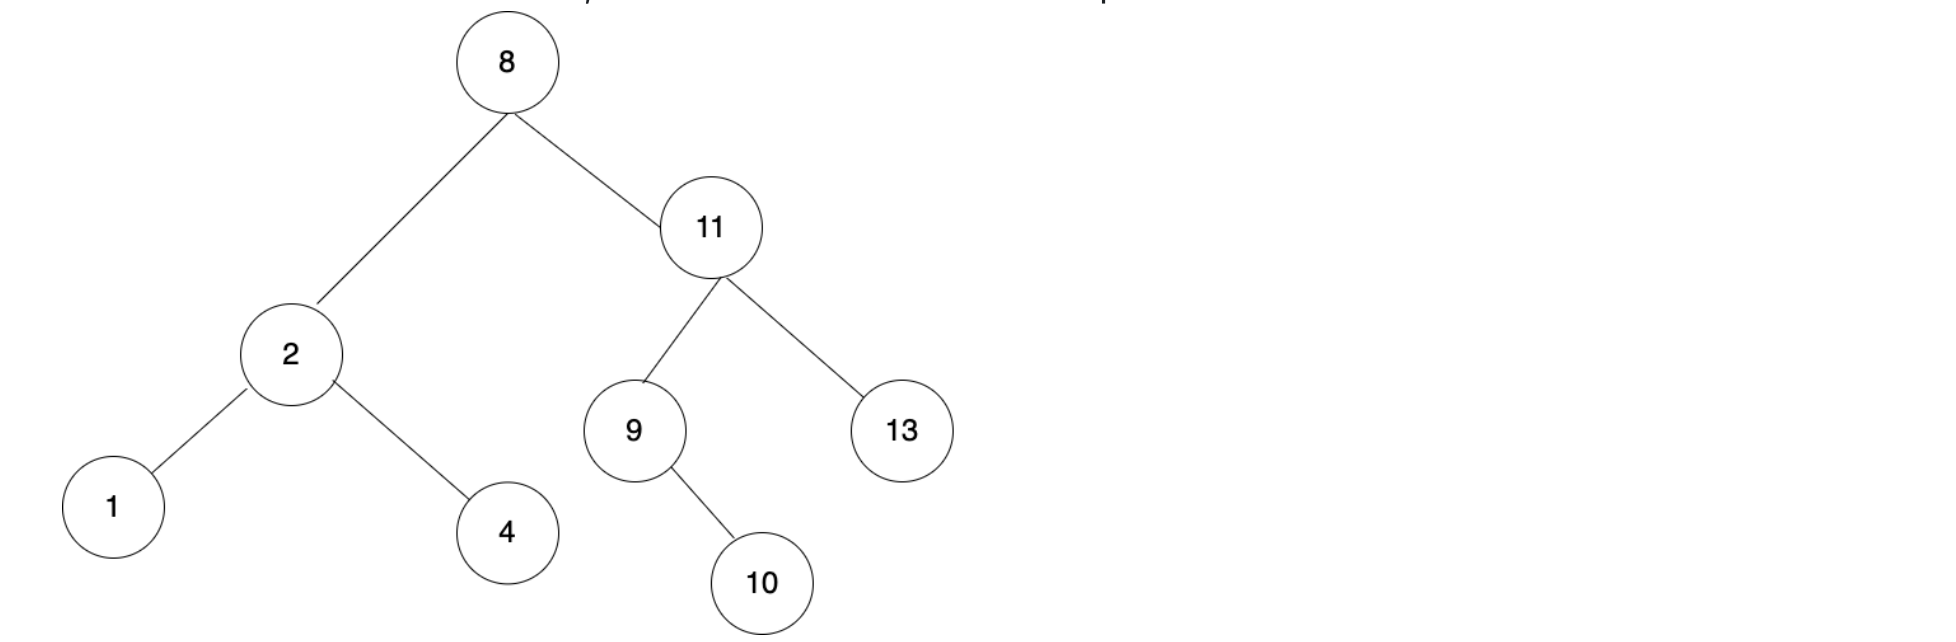

In [19]:
nod1 = {"value": 1, "left": None, "right": None}
nod4 = {"value": 4, "left": None, "right": None}
nod10 = {"value": 10, "left": None, "right": None}
nod13 = {"value": 13, "left": None, "right": None}
nod2 = {"value": 2, "left": nod1, "right": nod4}
nod9 = {"value": 9, "left": None, "right": nod10}
nod11 = {"value": 11, "left": nod9, "right": nod13}
nod8 = {"value": 8, "left": nod2, "right": nod11}
radacina = nod8

In [20]:
# Scrieti o functie care primeste ca parametru un arbore binar de cautare si un numar x
# si returneaza True daca gaseste numarul in arborele binar de cautare,
# altfel returneaza False.

def cautare(arbore_binar_cautare, x):
  if x == arbore_binar_cautare['value']:
    return True
  elif x < arbore_binar_cautare["value"]:
    if arbore_binar_cautare["left"]:        # daca exista nodul stang
      return cautare(arbore_binar_cautare["left"], x)
    return False
  else:
    if arbore_binar_cautare["right"]:
      return cautare(arbore_binar_cautare["right"], x)
    return False

print(cautare(radacina, 11))
print(cautare(radacina, 12))
print(cautare(radacina, 4))
print(cautare(radacina, 6))
print(cautare(radacina, 8))
print(cautare(radacina, 7))

True
False
True
False
True
False


**Util**: Puteti vizualiza procedeul de cautare intr-un arbore binar de cautare [aici](https://www.cs.usfca.edu/~galles/visualization/BST.html)

LAB

1. Scrieți o funcție care ia un arbore binar și returnează lista nodurilor care au un singur fiu. Ordinea nodurilor în listă va fi cea din traversarea în inordine